# Exercise 4: Wave equation on a rectangle
Consider a forced wave equation on a square
\begin{align}
	u_{tt} - c^2 \Delta u = f(x,y),\qquad 0<x<L, \, 0<y<H, \, t>0,
\end{align}
with homogeneous boundary conditions
\begin{align}
	u(0,y,t) &= 0,\\
	u(L,y,t) &= 0,\\
	u(x,0,t) &= 0,\\
	u(x,H,t) &= 0.
\end{align}
The initial conditions are
\begin{align}
	u(x,y,0) &= g(x,y),\\
	u_t(x,y,0) &= 0.
\end{align}
Note that $f(x,y)$ does not depend on $t$.

There are various ways to start solving this PDE. Here, it is suggested to start with an eigenfunction expansion $u = \sum_{n=1}^\infty a_n(y,t) \phi_n(x)$. 

a) Apply this eigenfunction expansion, following steps b)-c) of notebook 1. 
>**Checklist**
>* Instead of arriving at an ODE for $a_n$, you will have a PDE for $a_n$ after this.

After completing the eigenfunction expansion, you have a PDE for $a_n(y,t)$. We need to select a method for solving this PDE. Again, there are multiple methods that work here. It is suggested here to use another eigenfunction expansion $a_n = \sum_{m=1}^\infty b_{n,m}(t) \psi_{n,m}(y)$. 

b) Apply this eigenfunction expansion and solve the final ODE in $t$, following steps a)-d) of exercise 1.
>**Checklist**
>* Structure now becomes important to prevent messy solutions. Solving the PDE for $a_n$ can be seen as solving an exercise within an exercise. It may help you to also treat it like this on your paper. I.e. before starting to solve, make sure you wrote down the PDE for $a_n$ and the BC/IC. Check for yourself that eigenfunction expansion is indeed a suitable technique for this PDE. 
>* Pay attention to the indices $n$ and $m$ and make sure you fully understand where and how to use them. The index $n$ needs to be written everywhere as $a_n$ depends on $n$, while $m$ is the index we are actively working on in this eigenfunction expansion. 
>* If you used the symbol $\lambda$ for the eigenfunctions in part a), then use another symbol here, e.g. $\mu$. What index ($n$, $m$ or $(n,m)$) should you use for $\mu$?
>* The ODE can be solved by hand. Note again that $f(x,y)$ does not depend on $t$.

c) Combine all of the above to find the final solution.

d) Use the script below to look at a few modes at a fixed time. Try a few values of the mode numbers and time.

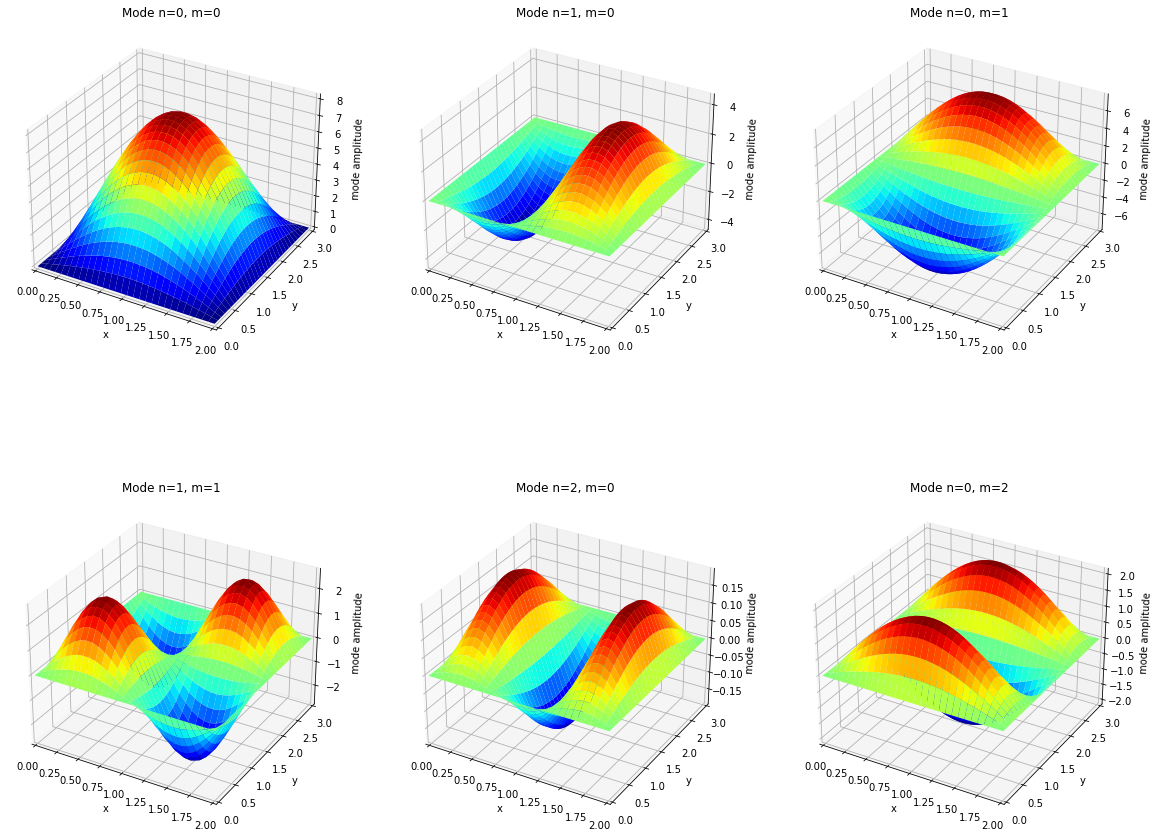

In [57]:
%pip install numpy matplotlib sympy
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import matplotlib
import sympy as sp
from IPython.display import display
from IPython.display import Image
import numpy as np

# Define variables to use in Sympy
x_s, y_s, H_s, L_s = sp.symbols('x y H L')
n_s, m_s = sp.symbols('n m', integer = True, positive=True)

# Input
f = x_s**2*(x_s-L_s)*y_s**3*(y_s-H_s)
g = 0
L = 2
H = 3
T = 10
N = 10
M = 12
c = 1

# Define arrays
lenx = 30
leny = 32
lent = 100
x = np.linspace(0,L,lenx).reshape((lenx, 1, 1, 1, 1))
y = np.linspace(0,H,leny).reshape((1, leny, 1, 1, 1))
t = np.linspace(0,T,lent).reshape((1, 1, lent, 1, 1))
n = np.arange(1, N+1).reshape((1, 1, 1, N, 1))
m = np.arange(1, M+1).reshape((1, 1, 1, 1, M))

# Sympy computations. Compute f_nm, g_nm.
f_nm_s = 4/(L_s*H_s)*sp.integrate(sp.integrate(f*sp.sin(n_s*sp.pi/L_s*x_s)*sp.sin(m_s*sp.pi/H_s*y_s), (x_s, 0, L_s)), (y_s, 0, H_s))
g_nm_s = 4/(L_s*H_s)*sp.integrate(sp.integrate(g*sp.sin(n_s*sp.pi/L_s*x_s)*sp.sin(m_s*sp.pi/H_s*y_s), (x_s, 0, L_s)), (y_s, 0, H_s))
f_nm_fun = sp.lambdify((n_s,m_s,L_s,H_s), f_nm_s, modules='numpy')
g_nm_fun = sp.lambdify((n_s,m_s,L_s,H_s), g_nm_s, modules='numpy')
f_fun = sp.lambdify((x_s,y_s,L_s,H_s), f, modules='numpy')

# Numpy: define functions f_nm, g_nm, eigenfunctions phi and psi and coefficients b_nm
f_nm = f_nm_fun(n, m, L, H) # translate to numpy
g_nm = g_nm_fun(n, m, L, H)
f_numpy = f_fun(x,y,L,H)

phi_n = np.sin(n*np.pi/L*x)
psi_m = np.sin(m*np.pi/H*y)
b_nm = np.cos(c*np.sqrt((n*np.pi/L)**2 + (m*np.pi/H)**2)*t)

# Modes
mode_nm = phi_n*psi_m*(g_nm*b_nm + f_nm*(1-b_nm))

mode1 = (0,0) # mode number as a tuple. Why is now a set of two numbers needed to define a mode?
mode2 = (1,0)
mode3 = (0,1)
mode4 = (1,1) 
mode5 = (2,0)
mode6 = (0,2)
plot_time = 10 # actually not a time but a number between 0 and lent (defined above)

# Total solution
u = np.sum(mode_nm, axis=(3,4))

# Plot
X, Y = np.meshgrid(x, y)
modes = [mode1, mode2, mode3, mode4, mode5, mode6]
fig = plt.figure(figsize=(20,16))
for q in range(6):
    ax = fig.add_subplot(2, 3, q+1, projection='3d')
    ax.plot_surface(X,Y,mode_nm[:,:,10,(modes[q])[0], (modes[q])[1]].T, cmap='jet')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mode amplitude')
    ax.set_xlim(0,L)
    plt.ylim(0,H)
    plt.title('Mode n='+str(modes[q][0]) + ', m='+str(modes[q][1]))

plt.show()

Let's have a look at an animation of the total solution for a few cases <br>
(NB. generating the animation may take a few minutes).

e) Try solutions for $f=0$, $g\neq 0$ and $f\neq 0$ and $g= 0$ in the code above and run the code above and below again. Describe what happens with the total amount of energy is this system over time. How do you see this in the solution?

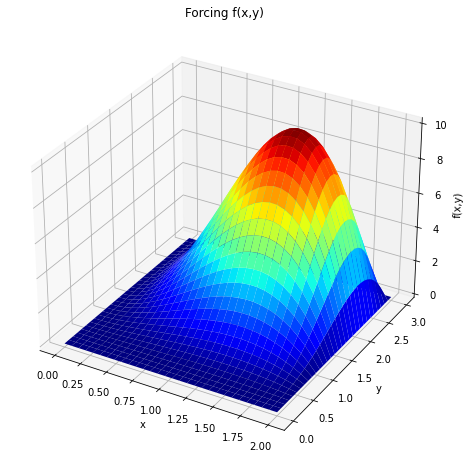

MovieWriter ffmpeg unavailable; using Pillow instead.


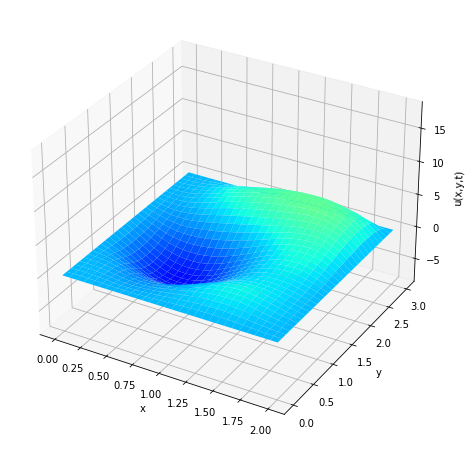

In [54]:
## Plot foricng f and animation of solution
# Set vertical limits and framerate
maxval = np.max(u)
minval = np.min(u)
fps = 10 # frame per sec

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number].T, cmap="jet", vmin=minval, vmax=maxval)

# Plot forcing
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f_numpy[:,:,0,0,0].T, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Forcing f(x,y)')
plt.show()

# Animation
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
plot = [ax.plot_surface(X, Y, u[:,:,0].T)]
ax.set_zlim(minval,maxval)
ani = animation.FuncAnimation(fig, update_plot, lent, fargs=(u, plot), interval=1000/fps)
ax.set_xlabel('x')
ax.set_ylabel('y')
fn = 'plot_surface_animation_funcanimation'
ani.save(fn+'.gif',fps=fps)

Image(url='plot_surface_animation_funcanimation.gif')